## Lasso Regresyon Modeli

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.

**Lasso Regresyon**

- Ridge regresyonunun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
- lasso'da katsayıları sıfıra yaklaştırır.
- Fakat L1 normu lambda yeteri kadar büyük olduğunda bazı katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur.
- lambda'nın doğru seçilmesi çok önemlidir,burada CV kullanılır.
- Ridge ve Lasso yöntemleri birbirinden üstün değildir.

**Lambda ayar parametresinin Belirlenmesi**

- Lambda'nın sıfır olduğu yerde EKK'dır. HKT'yi minimum yapan lambda'yı arıyoruz.
- lambda için belirli değerleri içeren bir küme seçilir ve her birisi için CV test hatası hesaplanır.
- En küçük CV'ı veren lambda ayar parametresi olarak seçilir.
- Son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.

In [1]:
## Model Geliştirilmesi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import RidgeCV,LassoCV

In [3]:
# Veri setini yükleme
df = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\machine learning\Doğrusal Regresyon Modelleri\Lasso Regresyon\Hitters.csv") 

# Eksik değerleri kaldırma
df = df.dropna()

# Kategorik değişkenleri dummy değişkenlere çevirme
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True)

# Hedef ve bağımsız değişkenlerin ayrılması
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Bağımsız değişkenlerin birleştirilmesi
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Eğitim ve test setlerinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
df.shape

(263, 20)

In [6]:
lasso_model=Lasso().fit(X_train,y_train)

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [7]:
lasso_model

Lasso()

In [8]:
lasso_model.intercept_

-5.587450677336733

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
# farklı lambda değerlerine karsilik sayilar

lasso= Lasso()
coefs=[]
alphas=10**np.linspace(10,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

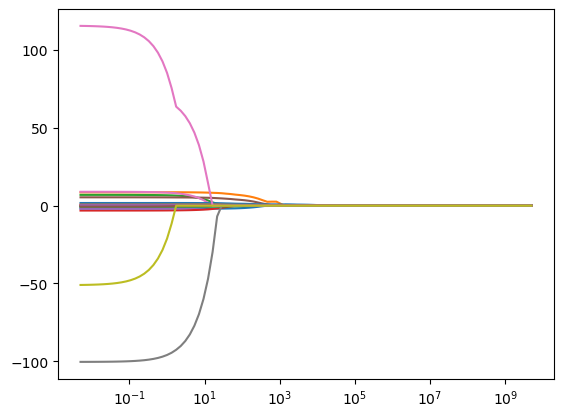

In [11]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

## Tahmin

In [12]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [13]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [14]:
y_pred=lasso_model.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554034

In [16]:
# bağımsız değişkenlerle bağımlı değişkendeki değişikliğin açııklanma yüzzdesidr.
r2_score(y_test,y_pred)

0.41422798132366156

## Model Tuning

In [17]:
alphas=10**np.linspace(10,-2,100)*0.5

In [18]:
lasso_cv_model=LassoCV(alphas = alphas, cv=10,max_iter=100000).fit(X_train,y_train)

In [19]:
lasso_cv_model.alpha_

201.85086292982749

In [20]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [21]:
y_pred=lasso_tuned.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037447

In [23]:
pd.Series(lasso_tuned.coef_ , index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64